In [7]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
nltk.download('stopwords')
import gensim
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanhyachitle/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#data_copy = pd.read_csv('news.csv')

In [8]:
data = pd.read_csv('news.csv')

In [9]:
data.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [10]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [13]:
def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to description and text"
    data = data.dropna(how="any")
    
    for col in ['description', 'text']:
        data[col] = data[col].apply(clean_sentence)
    
    return data


In [14]:
data = clean_dataframe(data)
data.head(5)

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,canadian pharmacies limiting much medication d...,canadian pharmacies limiting much medication d...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,yukon government identified two places whiteho...,yukon government identified two places whiteho...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,senate passed unparalleled 22 trillion economi...,senate late wednesday passed unparalleled 22 t...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,scientists around world racing find novel ways...,scientists around world racing find novel ways...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,latest coronavirus outbreak cbc news thursday ...,trudeau says rules quarantine act enforced...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [16]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['description', 'text']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['canadian',
  'pharmacies',
  'limiting',
  'much',
  'medication',
  'dispensed',
  'try',
  'prevent',
  'shortages',
  'recognizing',
  'active',
  'ingredients',
  'drugs',
  'india',
  'china',
  'medical',
  'supply',
  'chains',
  'disrupted',
  'spread',
  'covid19'],
 ['yukon',
  'government',
  'identified',
  'two',
  'places',
  'whitehorse',
  '',
  'church',
  'dental',
  'clinic',
  '',
  'people',
  'may',
  'exposed',
  'coronavirus',
  'recent',
  'weeks']]

In [17]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

/Users/tanhyachitle/opt/anaconda3/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [18]:
model.wv['covid19']

array([-5.0564492e-01, -6.6028112e-01, -1.4728436e-01, -1.6126794e-01,
        4.5391373e-02,  9.5879710e-01, -3.6456637e+00,  1.4955573e+00,
       -2.8271000e+00, -1.0716120e+00,  9.4556808e-01,  7.7925712e-02,
        2.2583199e+00, -1.5522705e+00,  2.1088018e+00, -3.1194983e+00,
       -1.3875310e+00, -1.0681139e+00,  1.0664220e+00, -4.4239858e-01,
       -5.3706235e-01, -1.7014771e+00,  4.6064535e-01, -2.8222520e+00,
        3.2484549e-01,  8.0200285e-01, -6.0383147e-01,  3.9474472e-01,
        4.0296057e-01,  1.2831954e+00,  9.9278992e-01,  8.5322618e-01,
        2.2836182e+00, -2.3791499e+00, -1.2420716e+00, -2.2068446e+00,
        1.0444450e-01, -1.3625273e-01,  1.0326780e+00,  1.5421444e+00,
        7.7606177e-01,  1.2371469e+00, -3.5091162e-01,  1.8870033e+00,
        3.1059965e-01,  7.8077906e-01,  3.4513739e-01,  1.7918988e+00,
        2.1692199e-01, -1.7834200e+00, -9.1932213e-01, -1.5077450e+00,
        1.3353392e+00, -3.9571732e-01,  1.6833623e-01, -3.6091056e-01,
      

In [19]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/tanhyachitle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


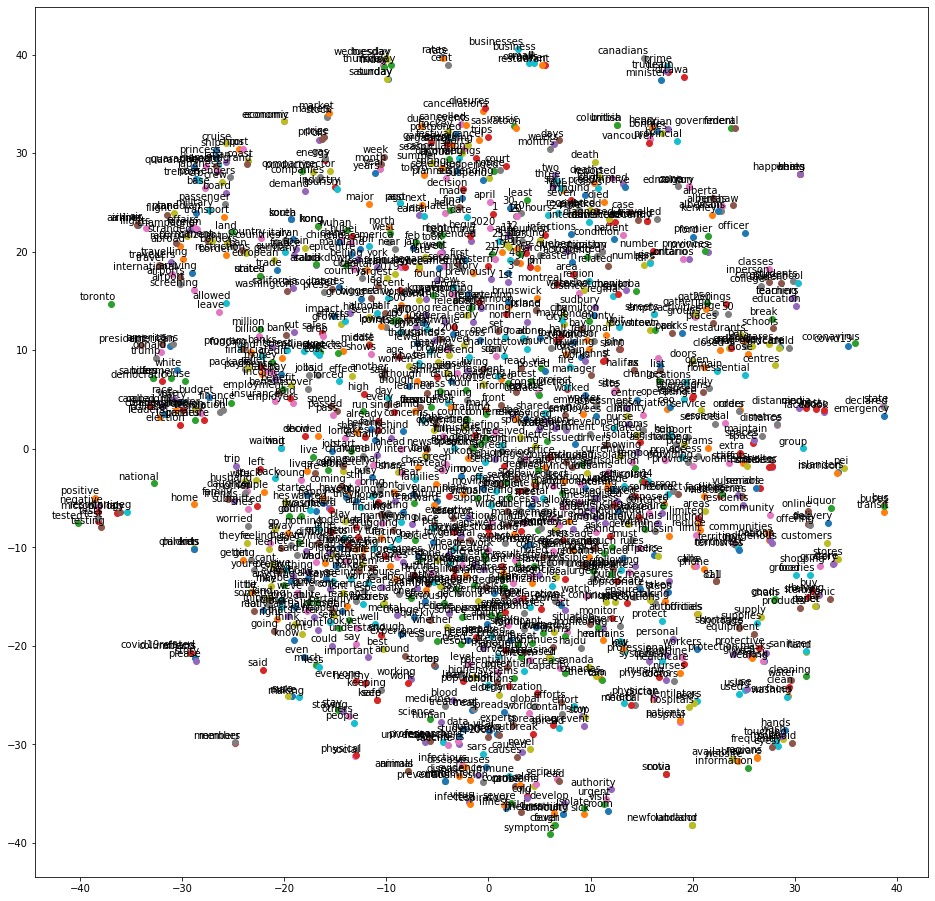

In [20]:
tsne_plot(model)

In [ ]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=1000, workers=4)
tsne_plot(model)

/Users/tanhyachitle/opt/anaconda3/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
